In [106]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

# get the output for all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Major steps invloved in EDA

1.Check for Duplicates

2.Handle missing values

3.Handle outliers

4.Descriptive Statistics

5.Data Visualization

6.Feature Scaling: Standardization & Normalization

7.Binning & Encoding

In [107]:
df=pd.read_csv(r"C:\Data\dataframe_.csv")

In [108]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [109]:
df.shape
df.size
df.info()

(1697, 2)

3394

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


# Data Cleaning/Data preprocessing
##  check for duplicates

In [110]:
df.duplicated()
df.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
1692     True
1693     True
1694     True
1695     True
1696     True
Length: 1697, dtype: bool

False    1091
True      606
dtype: int64

In [111]:
df[df.duplicated()]

,input,output
106,-63.366669,-33.000000
464,112.633331,103.000000
715,-31.366669,-49.000000
819,-117.366669,-75.000000
865,-131.366669,-125.000000
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [112]:
df.drop_duplicates(keep='first',inplace=True)

In [113]:
df.reset_index(inplace=True)

In [114]:
df.drop(['index'],axis=1,inplace=True)

In [115]:
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1086,-119.954237,123.609122
1087,-109.942155,127.197394
1088,-111.515368,128.170885
1089,-110.344221,123.087950


# Missing Values

In [116]:
df.isna()

,input,output
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1086,False,False
1087,False,False
1088,False,False
1089,False,False


In [117]:
df.isna().sum()


input     1
output    1
dtype: int64

In [118]:
df[df.input.isna()]

,input,output
1090,NaN,NaN


In [119]:
df.iloc[1090:1091]

,input,output
1090,NaN,NaN


<AxesSubplot:>

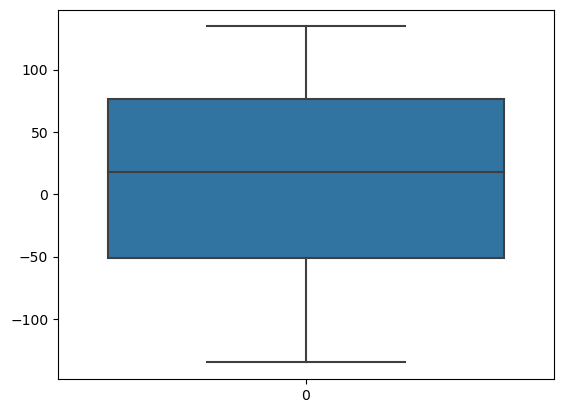

In [120]:
sns.boxplot(df.input)

In [121]:
#There are no outliers in input data so filling the null value with mean
df.input.fillna(df.input.mean())
df.input=df.input.fillna(df.input.mean())

0      -122.740667
1      -121.531419
2      -134.917019
3      -120.605951
4      -129.894781
           ...    
1086   -119.954237
1087   -109.942155
1088   -111.515368
1089   -110.344221
1090      8.116185
Name: input, Length: 1091, dtype: float64

In [122]:
df.iloc[1090:1091]

,input,output
1090,8.116185,NaN


<AxesSubplot:>

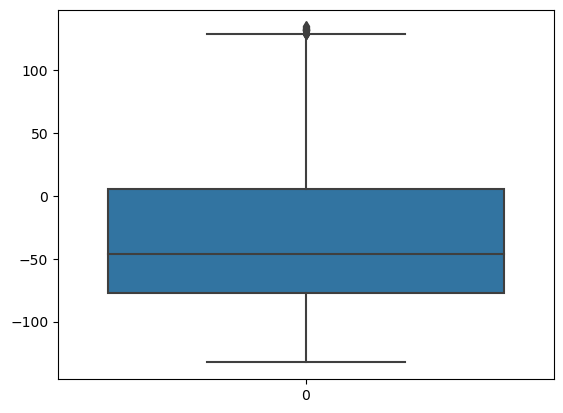

In [123]:
sns.boxplot(df.output)

In [124]:
#There are outliers in output data so filling the null value with median
df.output.fillna(df.output.median())
df.output=df.output.fillna(df.output.median())

0      -130.572085
1      -129.938929
2      -130.141832
3      -125.760932
4      -112.785214
           ...    
1086    123.609122
1087    127.197394
1088    128.170885
1089    123.087950
1090    -46.300938
Name: output, Length: 1091, dtype: float64

In [125]:
df.iloc[1090:1091]

,input,output
1090,8.116185,-46.300938


# Identify corrupted data 

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1091 non-null   float64
 1   output  1091 non-null   float64
dtypes: float64(2)
memory usage: 17.2 KB


In [127]:
# No currupted data so no need of converting currupted data into missing values

# Outliers Detection And Removing
## NOTE: Not Doing ouliers treatment here- did in the below bonus section Seperately

In [128]:
df.skew()

input    -0.283801
output    0.923302
dtype: float64

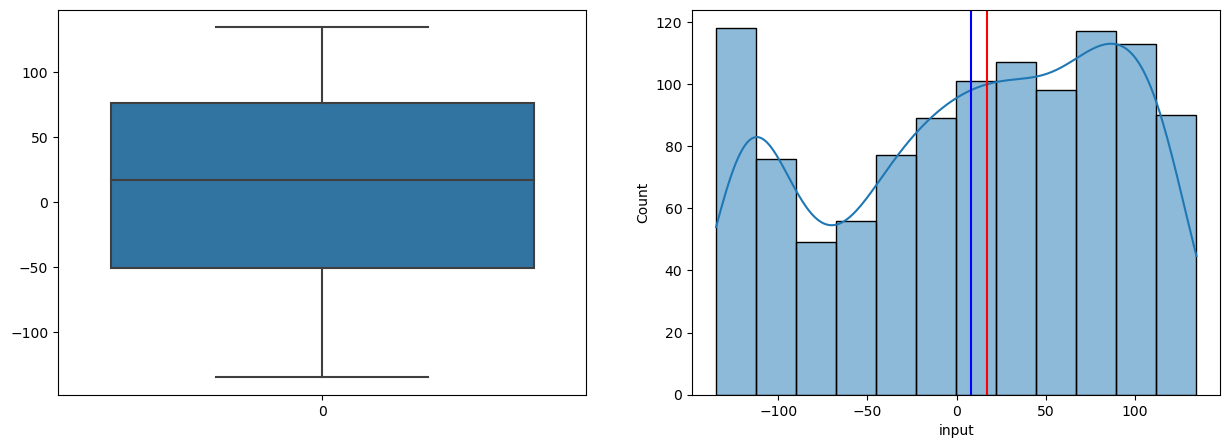

In [129]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.input)

plt.subplot(122)
sns.histplot(df.input, kde = True)
plt.axvline(df.input.mean(), color = 'blue')
plt.axvline(df.input.median(), color = 'red');

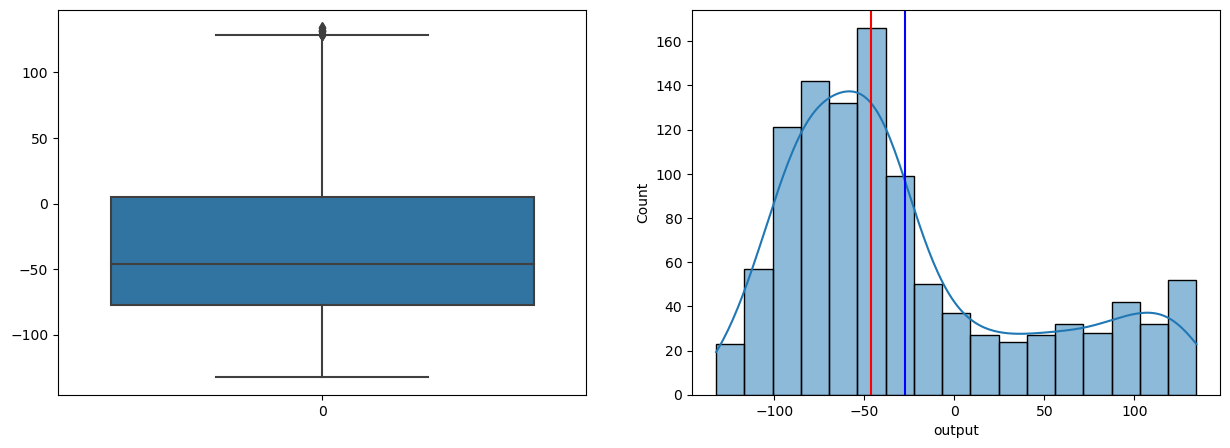

In [130]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.output)

plt.subplot(122)
sns.histplot(df.output, kde = True)
plt.axvline(df.output.mean(), color = 'blue')
plt.axvline(df.output.median(), color = 'red');

In [131]:
df1=df

## Z-score method

In [132]:
outliers=[]
def detect_otlier(df):
    threshold=3
    mean=np.mean(df.output)
    std=np.std(data.output)

    for i in data:
        z_score=(i - mean )/std
        if np.abs(z_score) > threshold:
            ouliers.append(i)
    return outliers

In [133]:
outliers

[]

## IQR Method

In [134]:
num=['output']
def out(col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    outliers=df[(df[col]<lb) | (df[col]>ub)].index
    return outliers
droplist=[]
for i in num:
    droplist.extend(out(i))

In [135]:
droplist,len(droplist)

([354,
  358,
  359,
  361,
  471,
  473,
  475,
  478,
  1056,
  1060,
  1061,
  1062,
  1066,
  1068,
  1069,
  1070,
  1071],
 17)

In [136]:
df.drop(droplist,axis=0,inplace=True)

# Analysis

In [137]:
df.head(5)

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


<AxesSubplot:xlabel='input', ylabel='output'>

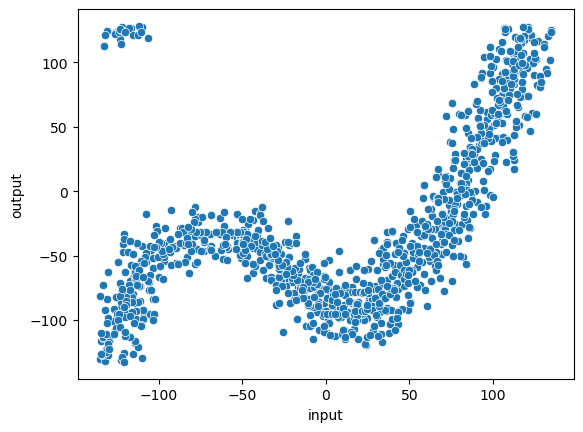

In [138]:
sns.scatterplot(x=df.input,y=df.output)

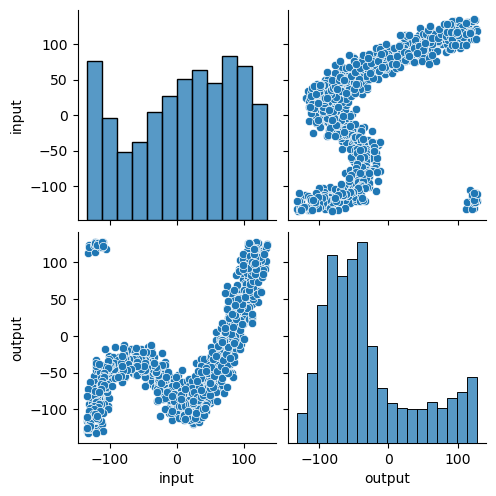

In [139]:
sns.pairplot(df);

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074 entries, 0 to 1090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1074 non-null   float64
 1   output  1074 non-null   float64
dtypes: float64(2)
memory usage: 25.2 KB


# Machine Learning Problem
**Build a system which can take features like age,sex,bmi,children,smoker,region and predicts the medical cost.**

Target Variable : **Charges**

# Data Preparation
* Train Test Split
* Encoding for Categorical Columns
  * Ordinal : LabelEncoding or OrdinalEncoding
  * Nominal : OneHotEncoding or get_dummies
*  Encoding for Numerical Columns
  * Standardization (z-transformation)

In [141]:
import sklearn

print(sklearn.__version__)

1.2.1


# a. Identify the Target Variable and Splitting the Data into Train and Test


In [142]:
# Identifying the inputs (X) and output (y)
X=df[['input']]
y=df['output']

In [143]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=69)

In [144]:
X_train.head()

,input
198,-27.490204
78,-89.366669
395,73.633331
874,33.210514
80,-92.649254


In [145]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(751, 1) (751,)
(323, 1) (323,)


# b. Separating Categorical and Numerical Columns:

In [146]:
X_train.dtypes

input    float64
dtype: object

### we have only one column 'input' as input and that is a numerical column

In [147]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,input
198,-27.490204
78,-89.366669
395,73.633331
874,33.210514
80,-92.649254


# c. Scaling the Numerical Features

In [148]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,input
198,-0.441132
78,-1.239418
395,0.863491
874,0.341985
80,-1.281767


In [149]:
X_train_num.describe()

,input
count,751.000000
mean,6.702679
std,77.563338
min,-134.917019
25%,-50.994194
50%,15.833633
75%,73.473642
max,134.605775


In [150]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 1
Mean of each column: [6.70267879]
Std of each column: [77.51168106]


In [151]:
X_train_num_rescaled.describe()

,input
count,7.510000e+02
mean,-1.182661e-17
std,1.000666e+00
min,-1.827076e+00
25%,-7.443636e-01
50%,1.178010e-01
75%,8.614310e-01
max,1.650114e+00


# f. Preparing Test Data

In [152]:
X_test.head()
X_test.info()

,input
515,111.916978
519,71.904040
440,120.248557
683,-10.505132
477,120.633331


<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 515 to 1045
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   323 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB


In [153]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,input
515,111.916978
519,71.904040
440,120.248557
683,-10.505132
477,120.633331


In [154]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,input
515,1.357399
519,0.841181
440,1.464887
683,-0.222003
477,1.469851


# Linear Regression

In [155]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_num_rescaled, y_train)

LinearRegression()

In [156]:
y_test_pred = regressor.predict(X_test_num_rescaled)

In [157]:
sanju_df=pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [158]:
sanju_df

,Actual,Predicted
515,26.966184,13.428141
519,58.300098,-3.139541
440,74.110185,16.877899
683,-70.137383,-37.261729
477,127.000000,17.037218
...,...,...
1042,107.000000,14.138811
763,-28.189796,-72.603460
316,27.900162,9.019978
363,-56.000000,-16.915549


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

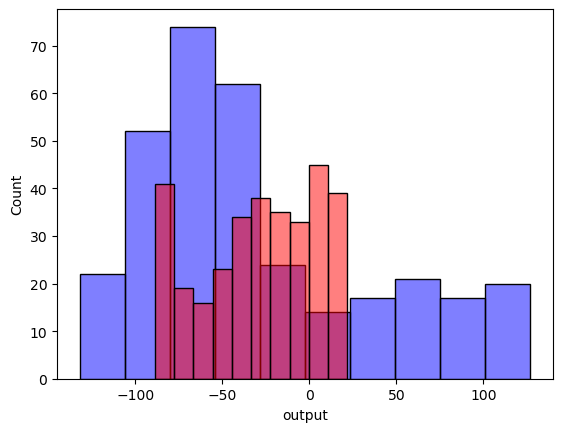

In [159]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [160]:
from sklearn import metrics

MeanAbsoluteError_LR=metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_LR= metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_LR=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Absolute Error:',MeanAbsoluteError_LR)
print('Mean Squared Error: ', MeanSquaredError_LR)

print('Root Mean Squared Error: ', RootMeanSquaredError_LR)

Mean Absolute Error: 42.456107432147014
Mean Squared Error:  2845.4309418332778
Root Mean Squared Error:  53.34258094461945


# KNN Regression

In [161]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_num_rescaled, y_train)

KNeighborsRegressor()

In [162]:
y_test_pred = regressor.predict(X_test_num_rescaled)

In [163]:
sanju_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

sanju_df.head()

,Actual,Predicted
515,26.966184,68.526733
519,58.300098,-15.249823
440,74.110185,96.181587
683,-70.137383,-78.989125
477,127.000000,93.856218


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

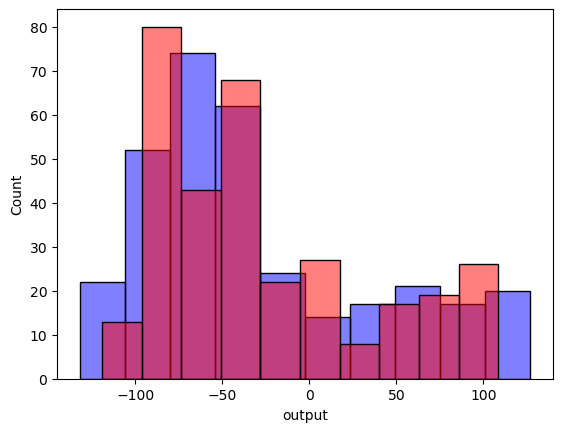

In [164]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [165]:
MeanAbsoluteError_KNN= metrics.mean_absolute_error(y_test, y_test_pred)

MeanSquaredError_KNN= metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_KNN=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Absolute Error:',MeanAbsoluteError_KNN)
print('Mean Squared Error: ', MeanSquaredError_KNN)
print('Root Mean Squared Error: ', RootMeanSquaredError_KNN)

Mean Absolute Error: 22.948966182978328
Mean Squared Error:  1286.044420301921
Root Mean Squared Error:  35.861461491438426


# Decision Tree Regression

In [166]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_num_rescaled, y_train)

DecisionTreeRegressor()

In [167]:
y_test_pred = regressor.predict(X_test_num_rescaled)

In [168]:
cost_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

cost_df.head()

,Actual,Predicted
515,26.966184,30.205428
519,58.300098,11.947285
440,74.110185,125.500000
683,-70.137383,-87.000000
477,127.000000,125.500000


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

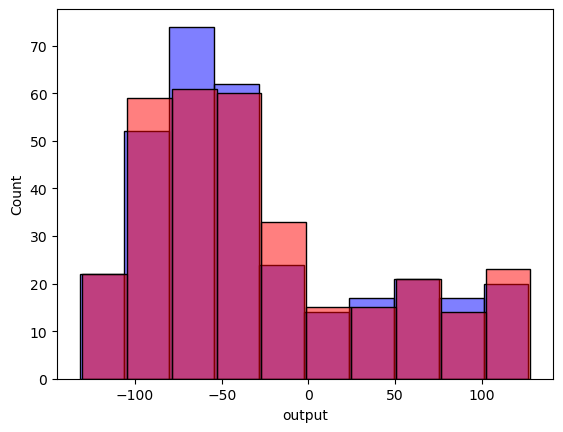

In [169]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [170]:
MeanAbsoluteError_DTR= metrics.mean_absolute_error(y_test, y_test_pred)

MeanSquaredError_DTR= metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_DTR=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Absolute Error:',MeanAbsoluteError_DTR)
print('Mean Squared Error: ', MeanSquaredError_DTR)
print('Root Mean Squared Error: ', RootMeanSquaredError_DTR)

Mean Absolute Error: 29.81649717691538
Mean Squared Error:  2587.8798709274506
Root Mean Squared Error:  50.87120866391372


# Random Forest Regression

In [171]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_num_rescaled, y_train)

RandomForestRegressor()

In [172]:
y_test_pred = regressor.predict(X_test_num_rescaled)

In [173]:
cost_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

cost_df.head()

,Actual,Predicted
515,26.966184,55.487699
519,58.300098,-4.753605
440,74.110185,118.650735
683,-70.137383,-78.870150
477,127.000000,118.134171


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

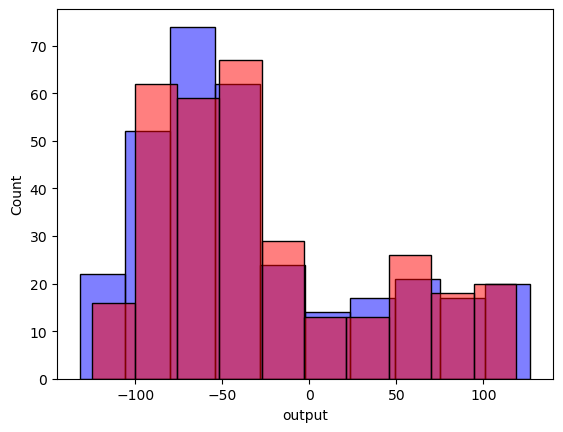

In [174]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [175]:
MeanAbsoluteError_RFR= metrics.mean_absolute_error(y_test, y_test_pred)

MeanSquaredError_RFR= metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_RFR=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Absolute Error:',MeanAbsoluteError_RFR)
print('Mean Squared Error: ', MeanSquaredError_RFR)
print('Root Mean Squared Error: ', RootMeanSquaredError_RFR)

Mean Absolute Error: 26.26534116863488
Mean Squared Error:  1758.6772605515728
Root Mean Squared Error:  41.936586181418875


# ADA Boost Regression

In [176]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor()
regressor.fit(X_train_num_rescaled, y_train)

y_test_pred = regressor.predict(X_test_num_rescaled)
MeanAbsoluteError_ADA= metrics.mean_absolute_error(y_test, y_test_pred)

MeanSquaredError_ADA= metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_ADA=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Absolute Error:',MeanAbsoluteError_ADA)
print('Mean Squared Error: ', MeanSquaredError_ADA)
print('Root Mean Squared Error: ', RootMeanSquaredError_ADA)

AdaBoostRegressor()

Mean Absolute Error: 29.224677023509766
Mean Squared Error:  1664.1193114858984
Root Mean Squared Error:  40.79361851424679


# GBDT Regression

In [177]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_num_rescaled, y_train)

y_test_pred = regressor.predict(X_test_num_rescaled)

MeanAbsoluteError_GBDT= metrics.mean_absolute_error(y_test, y_test_pred)

MeanSquaredError_GBDT= metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_GBDT=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Absolute Error:',MeanAbsoluteError_GBDT)
print('Mean Squared Error: ', MeanSquaredError_GBDT)
print('Root Mean Squared Error: ', RootMeanSquaredError_GBDT)

GradientBoostingRegressor()

Mean Absolute Error: 22.47459769454984
Mean Squared Error:  1447.8066193476106
Root Mean Squared Error:  38.050054130679115


# Support  Vector Regression

In [178]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_num_rescaled, y_train)

y_test_pred = regressor.predict(X_test_num_rescaled)

MeanAbsoluteError_SVR= metrics.mean_absolute_error(y_test, y_test_pred)

MeanSquaredError_SVR= metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_SVR=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Absolute Error:',MeanAbsoluteError_SVR)
print('Mean Squared Error: ', MeanSquaredError_SVR)
print('Root Mean Squared Error: ', RootMeanSquaredError_SVR)

SVR()

Mean Absolute Error: 25.33889839868472
Mean Squared Error:  1332.2969975061533
Root Mean Squared Error:  36.50064379577644


# Conclusion Before Treating Outliers
- Gradient Boosting Decision Tree Regressor (GBDT Regression) is best model to predict the output

- GBDT giving 25.034788813083377 of Mean Absolute Error which is very less compared to other algorithms

In [179]:
 [['Linear Regression',MeanAbsoluteError_LR, MeanSquaredError_LR, RootMeanSquaredError_LR],
                   ['K-Nearest Neighbor Regression', MeanAbsoluteError_KNN, MeanSquaredError_KNN, RootMeanSquaredError_KNN ],
                   ['Decision Tree Regression', MeanAbsoluteError_DTR,MeanSquaredError_DTR, RootMeanSquaredError_DTR ],
                   ['Random Forest Regression ', MeanAbsoluteError_RFR,MeanSquaredError_RFR, RootMeanSquaredError_RFR ],
                   ['Gradient Boosting Decision Tree Regression', MeanAbsoluteError_GBDT,MeanSquaredError_GBDT, RootMeanSquaredError_GBDT],
                   ['ADA Boost Regression',MeanAbsoluteError_ADA,MeanSquaredError_ADA, RootMeanSquaredError_ADA],
 ['Support Vector Regression',MeanAbsoluteError_SVR,MeanSquaredError_SVR, RootMeanSquaredError_SVR]]

data = pd.DataFrame(df, columns = ['Algorithm','Mean Absolute Error','Mean Square Error','Root Mean Square Error'])

[['Linear Regression',
  42.456107432147014,
  2845.4309418332778,
  53.34258094461945],
 ['K-Nearest Neighbor Regression',
  22.948966182978328,
  1286.044420301921,
  35.861461491438426],
 ['Decision Tree Regression',
  29.81649717691538,
  2587.8798709274506,
  50.87120866391372],
 ['Random Forest Regression ',
  26.26534116863488,
  1758.6772605515728,
  41.936586181418875],
 ['Gradient Boosting Decision Tree Regression',
  22.47459769454984,
  1447.8066193476106,
  38.050054130679115],
 ['ADA Boost Regression',
  29.224677023509766,
  1664.1193114858984,
  40.79361851424679],
 ['Support Vector Regression',
  25.33889839868472,
  1332.2969975061533,
  36.50064379577644]]

In [180]:
Results = pd.DataFrame({"Algorithm": ["LinearRegression","KNNRegressor","DecisionTreeRegressor", 
                                      "RandomForestRegressor","GradientBoostingRegressor",
                                     "AdaBoostRegressor", "SupportVectorRegressor",],
           "Mean Absolute Error": [MeanAbsoluteError_LR,MeanAbsoluteError_KNN, MeanAbsoluteError_DTR, 
                                   MeanAbsoluteError_RFR, MeanAbsoluteError_GBDT,
                                   MeanAbsoluteError_ADA,MeanAbsoluteError_SVR],
                        "Mean Squared Error": [MeanSquaredError_LR,MeanSquaredError_KNN, MeanSquaredError_DTR, 
                                   MeanSquaredError_RFR, MeanSquaredError_GBDT,
                                   MeanSquaredError_ADA,MeanSquaredError_SVR],
                       "Root Mean Squared Error":[RootMeanSquaredError_LR,RootMeanSquaredError_KNN, RootMeanSquaredError_DTR, 
                                   RootMeanSquaredError_RFR, RootMeanSquaredError_GBDT,
                                   RootMeanSquaredError_ADA,RootMeanSquaredError_SVR]})

In [181]:
Results

,Algorithm,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,42.456107,2845.430942,53.342581
1,KNNRegressor,22.948966,1286.044420,35.861461
2,DecisionTreeRegressor,29.816497,2587.879871,50.871209
3,RandomForestRegressor,26.265341,1758.677261,41.936586
4,GradientBoostingRegressor,22.474598,1447.806619,38.050054
5,AdaBoostRegressor,29.224677,1664.119311,40.793619
6,SupportVectorRegressor,25.338898,1332.296998,36.500644


## Comparing Mean Absolute Error Values 

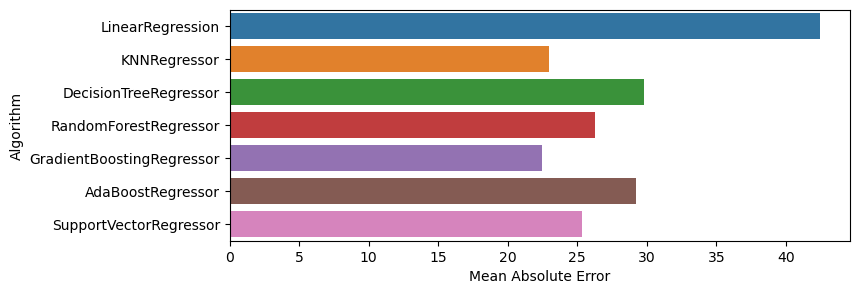

In [182]:
plt.figure(figsize=(8,3))
sns.barplot(y=Results.Algorithm,x=Results['Mean Absolute Error'], ci=False, orient='h');

# Conclusion:
- By Taking Mean Absolute Error Gradient Boost Decision Tree is giving less Mean absolute Error
- GBDT is Performing Better than other algorithms

# BONUS ******* 
### Did it seperately apart from above

# Proper outlier detection and treatment.
# Feature Engineering
Hyperparameter Tuning


In [183]:
df1.head()
# i have pre stored the data before removing outliers

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


## Cube Root Transfermation

In [184]:
df1["Output_cuberoot"] = df1.output**(1/3)

In [185]:
df1

,input,output,Output_cuberoot
0,-122.740667,-130.572085,NaN
1,-121.531419,-129.938929,NaN
2,-134.917019,-130.141832,NaN
3,-120.605951,-125.760932,NaN
4,-129.894781,-112.785214,NaN
...,...,...,...
1086,-119.954237,123.609122,4.981386
1087,-109.942155,127.197394,5.029129
1088,-111.515368,128.170885,5.041926
1089,-110.344221,123.087950,4.974375


In [186]:
df1.isna().sum()

input                0
output               0
Output_cuberoot    810
dtype: int64

# Log Transformation

In [187]:
df1["log"] = np.log(df1.output)

In [188]:
df1

,input,output,Output_cuberoot,log
0,-122.740667,-130.572085,NaN,NaN
1,-121.531419,-129.938929,NaN,NaN
2,-134.917019,-130.141832,NaN,NaN
3,-120.605951,-125.760932,NaN,NaN
4,-129.894781,-112.785214,NaN,NaN
...,...,...,...,...
1086,-119.954237,123.609122,4.981386,4.817124
1087,-109.942155,127.197394,5.029129,4.845740
1088,-111.515368,128.170885,5.041926,4.853364
1089,-110.344221,123.087950,4.974375,4.812899


In [189]:
df1.isna().sum()

input                0
output               0
Output_cuberoot    810
log                810
dtype: int64

# Normalization

In [190]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [191]:
# Normalization
mm = MinMaxScaler()

In [192]:
Norm = mm.fit_transform(df1.output.values.reshape(-1,1))

In [193]:
Norm.min()
Norm.max()

0.0

1.0

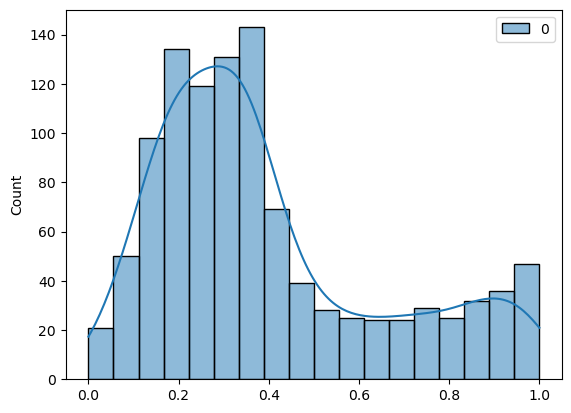

In [194]:
sns.histplot(Norm, kde = True);

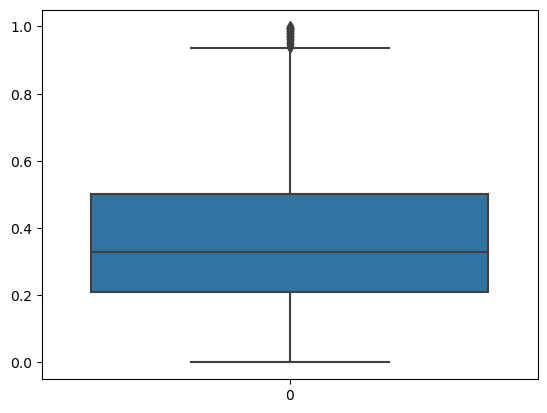

In [195]:
sns.boxplot(Norm);

# Standardization


In [196]:
# Standardization

ss = StandardScaler()

In [197]:
Standard = ss.fit_transform(df1.output.values.reshape(-1,1))

In [198]:
round(Standard.mean())
Standard.std()

0

1.0

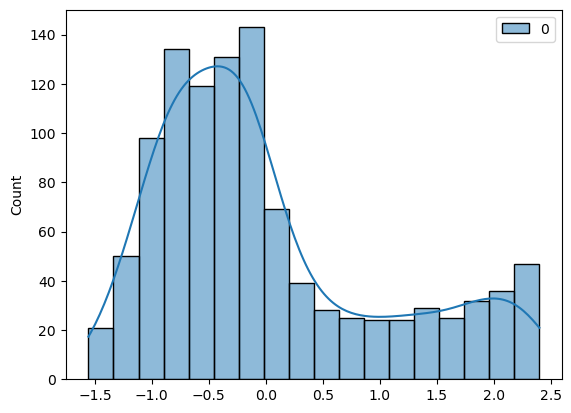

In [199]:
sns.histplot(Standard, kde = True);

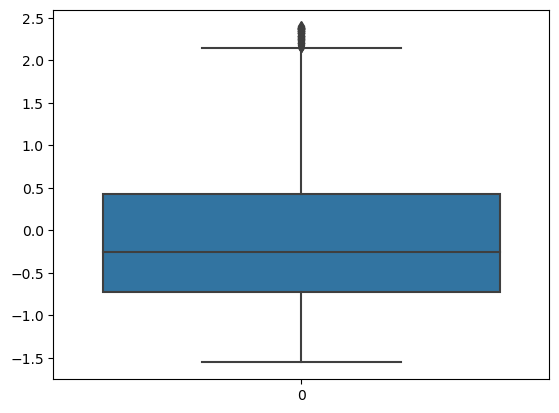

In [200]:
sns.boxplot(Standard);

In [201]:
df1["Standard"]=Standard
df1["Norm"]=Norm

In [202]:
df1

,input,output,Output_cuberoot,log,Standard,Norm
0,-122.740667,-130.572085,NaN,NaN,-1.528427,0.007100
1,-121.531419,-129.938929,NaN,NaN,-1.518814,0.009529
2,-134.917019,-130.141832,NaN,NaN,-1.521894,0.008751
3,-120.605951,-125.760932,NaN,NaN,-1.455379,0.025562
4,-129.894781,-112.785214,NaN,NaN,-1.258370,0.075355
...,...,...,...,...,...,...
1086,-119.954237,123.609122,4.981386,4.817124,2.330789,0.982495
1087,-109.942155,127.197394,5.029129,4.845740,2.385269,0.996264
1088,-111.515368,128.170885,5.041926,4.853364,2.400050,1.000000
1089,-110.344221,123.087950,4.974375,4.812899,2.322876,0.980495


In [203]:
df1.isna().sum()

input                0
output               0
Output_cuberoot    810
log                810
Standard             0
Norm                 0
dtype: int64

In [204]:
# Identifying the inputs (X) and output (y)
X=df1[['input']]
y=df1['Norm']

In [205]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=69)

In [206]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,input
198,-0.441132
78,-1.239418
395,0.863491
874,0.341985
80,-1.281767


In [207]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,input
515,1.357399
519,0.841181
440,1.464887
683,-0.222003
477,1.469851


In [208]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_num_rescaled, y_train)

y_test_pred = regressor.predict(X_test_num_rescaled)

from sklearn import metrics

MeanAbsoluteError_LR=metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_LR= metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_LR=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Absolute Error:',MeanAbsoluteError_LR)
print('Mean Squared Error: ', MeanSquaredError_LR)

print('Root Mean Squared Error: ', RootMeanSquaredError_LR)

LinearRegression()

Mean Absolute Error: 0.16292110312026073
Mean Squared Error:  0.0419008069199379
Root Mean Squared Error:  0.20469686592602707


In [209]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_num_rescaled, y_train)

y_test_pred = regressor.predict(X_test_num_rescaled)

MeanAbsoluteError_KNN= metrics.mean_absolute_error(y_test, y_test_pred)

MeanSquaredError_KNN= metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_KNN=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Absolute Error:',MeanAbsoluteError_KNN)
print('Mean Squared Error: ', MeanSquaredError_KNN)
print('Root Mean Squared Error: ', RootMeanSquaredError_KNN)

KNeighborsRegressor()

Mean Absolute Error: 0.0880643825385033
Mean Squared Error:  0.018937834038880573
Root Mean Squared Error:  0.13761480312408464


In [210]:
#DT
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_num_rescaled, y_train)

y_test_pred = regressor.predict(X_test_num_rescaled)


MeanAbsoluteError_DTR= metrics.mean_absolute_error(y_test, y_test_pred)

MeanSquaredError_DTR= metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_DTR=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Absolute Error:',MeanAbsoluteError_DTR)
print('Mean Squared Error: ', MeanSquaredError_DTR)
print('Root Mean Squared Error: ', RootMeanSquaredError_DTR)

DecisionTreeRegressor()

Mean Absolute Error: 0.11441785187228444
Mean Squared Error:  0.03810820119003203
Root Mean Squared Error:  0.1952132198137002


In [211]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_num_rescaled, y_train)

MeanAbsoluteError_DTR= metrics.mean_absolute_error(y_test, y_test_pred)

MeanAbsoluteError_RFR= metrics.mean_absolute_error(y_test, y_test_pred)

MeanSquaredError_RFR= metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_RFR=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Absolute Error:',MeanAbsoluteError_RFR)
print('Mean Squared Error: ', MeanSquaredError_RFR)
print('Root Mean Squared Error: ', RootMeanSquaredError_RFR)

RandomForestRegressor()

Mean Absolute Error: 0.11441785187228444
Mean Squared Error:  0.03810820119003203
Root Mean Squared Error:  0.1952132198137002


In [212]:
#ADA BOOST 
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor()
regressor.fit(X_train_num_rescaled, y_train)

y_test_pred = regressor.predict(X_test_num_rescaled)
MeanAbsoluteError_ADA= metrics.mean_absolute_error(y_test, y_test_pred)

MeanSquaredError_ADA= metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_ADA=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Absolute Error:',MeanAbsoluteError_ADA)
print('Mean Squared Error: ', MeanSquaredError_ADA)
print('Root Mean Squared Error: ', RootMeanSquaredError_ADA)

AdaBoostRegressor()

Mean Absolute Error: 0.10649906120366129
Mean Squared Error:  0.021771150812856972
Root Mean Squared Error:  0.1475505025842236


In [213]:
# GBDT
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_num_rescaled, y_train)

y_test_pred = regressor.predict(X_test_num_rescaled)

MeanAbsoluteError_GBDT= metrics.mean_absolute_error(y_test, y_test_pred)

MeanSquaredError_GBDT= metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_GBDT=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Absolute Error:',MeanAbsoluteError_GBDT)
print('Mean Squared Error: ', MeanSquaredError_GBDT)
print('Root Mean Squared Error: ', RootMeanSquaredError_GBDT)

GradientBoostingRegressor()

Mean Absolute Error: 0.08624404049363317
Mean Squared Error:  0.021319886813210436
Root Mean Squared Error:  0.14601331039741014


In [214]:
#SVR
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_num_rescaled, y_train)

y_test_pred = regressor.predict(X_test_num_rescaled)

MeanAbsoluteError_SVR= metrics.mean_absolute_error(y_test, y_test_pred)

MeanSquaredError_SVR= metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_SVR=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Absolute Error:',MeanAbsoluteError_SVR)
print('Mean Squared Error: ', MeanSquaredError_SVR)
print('Root Mean Squared Error: ', RootMeanSquaredError_SVR)

SVR()

Mean Absolute Error: 0.07334878914711822
Mean Squared Error:  0.013920062078322857
Root Mean Squared Error:  0.11798331271125954


In [215]:
 [['Linear Regression',MeanAbsoluteError_LR, MeanSquaredError_LR, RootMeanSquaredError_LR],
                   ['K-Nearest Neighbor Regression', MeanAbsoluteError_KNN, MeanSquaredError_KNN, RootMeanSquaredError_KNN ],
                   ['Decision Tree Regression', MeanAbsoluteError_DTR,MeanSquaredError_DTR, RootMeanSquaredError_DTR ],
                   ['Random Forest Regression ', MeanAbsoluteError_RFR,MeanSquaredError_RFR, RootMeanSquaredError_RFR ],
                   ['Gradient Boosting Decision Tree Regression', MeanAbsoluteError_GBDT,MeanSquaredError_GBDT, RootMeanSquaredError_GBDT],
                   ['ADA Boost Regression',MeanAbsoluteError_ADA,MeanSquaredError_ADA, RootMeanSquaredError_ADA],
 ['Support Vector Regression',MeanAbsoluteError_SVR,MeanSquaredError_SVR, RootMeanSquaredError_SVR]]

data = pd.DataFrame(df, columns = ['Algorithm','Mean Absolute Error','Mean Square Error','Root Mean Square Error'])

[['Linear Regression',
  0.16292110312026073,
  0.0419008069199379,
  0.20469686592602707],
 ['K-Nearest Neighbor Regression',
  0.0880643825385033,
  0.018937834038880573,
  0.13761480312408464],
 ['Decision Tree Regression',
  0.11441785187228444,
  0.03810820119003203,
  0.1952132198137002],
 ['Random Forest Regression ',
  0.11441785187228444,
  0.03810820119003203,
  0.1952132198137002],
 ['Gradient Boosting Decision Tree Regression',
  0.08624404049363317,
  0.021319886813210436,
  0.14601331039741014],
 ['ADA Boost Regression',
  0.10649906120366129,
  0.021771150812856972,
  0.1475505025842236],
 ['Support Vector Regression',
  0.07334878914711822,
  0.013920062078322857,
  0.11798331271125954]]

In [216]:
Results = pd.DataFrame({"Algorithm": ["LinearRegression","KNNRegressor","DecisionTreeRegressor", 
                                      "RandomForestRegressor","GradientBoostingRegressor",
                                     "AdaBoostRegressor", "SupportVectorRegressor",],
           "Mean Absolute Error": [MeanAbsoluteError_LR,MeanAbsoluteError_KNN, MeanAbsoluteError_DTR, 
                                   MeanAbsoluteError_RFR, MeanAbsoluteError_GBDT,
                                   MeanAbsoluteError_ADA,MeanAbsoluteError_SVR],
                        "Mean Squared Error": [MeanSquaredError_LR,MeanSquaredError_KNN, MeanSquaredError_DTR, 
                                   MeanSquaredError_RFR, MeanSquaredError_GBDT,
                                   MeanSquaredError_ADA,MeanSquaredError_SVR],
                       "Root Mean Squared Error":[RootMeanSquaredError_LR,RootMeanSquaredError_KNN, RootMeanSquaredError_DTR, 
                                   RootMeanSquaredError_RFR, RootMeanSquaredError_GBDT,
                                   RootMeanSquaredError_ADA,RootMeanSquaredError_SVR]})

In [217]:
Results

,Algorithm,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.162921,0.041901,0.204697
1,KNNRegressor,0.088064,0.018938,0.137615
2,DecisionTreeRegressor,0.114418,0.038108,0.195213
3,RandomForestRegressor,0.114418,0.038108,0.195213
4,GradientBoostingRegressor,0.086244,0.021320,0.146013
5,AdaBoostRegressor,0.106499,0.021771,0.147551
6,SupportVectorRegressor,0.073349,0.013920,0.117983


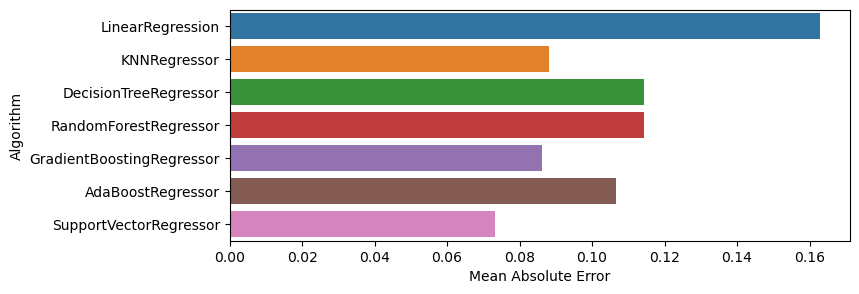

In [218]:
plt.figure(figsize=(8,3))
sns.barplot(y=Results.Algorithm,x=Results['Mean Absolute Error'], ci=False, orient='h');

# Conclusion After Transforming and Feature Engineering Of OUTLIERS
- ALL Algarithms performing good After Transformation
- But Out of all Support vector is having less Mean absolute error and will Perform Better

## Build a Linear Regression model by performing appropriate feature engineering.


In [219]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_num_rescaled, y_train)

LinearRegression()

In [220]:
y_test_pred = regressor.predict(X_test_num_rescaled)

In [221]:
sanju_df=pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [222]:
sanju_df

,Actual,Predicted
515,0.611637,0.559686
519,0.731878,0.496109
440,0.792547,0.572924
683,0.239012,0.365169
477,0.995507,0.573536
...,...,...
1042,0.918759,0.562413
763,0.399981,0.229548
316,0.615221,0.542770
363,0.293262,0.443245


<AxesSubplot:xlabel='Norm', ylabel='Count'>

<AxesSubplot:xlabel='Norm', ylabel='Count'>

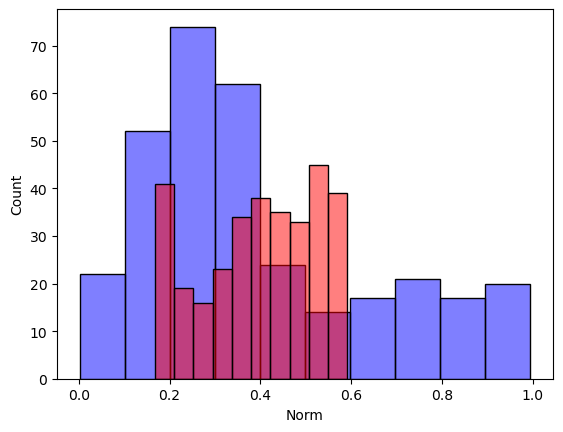

In [224]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [225]:
from sklearn import metrics

MeanAbsoluteError_LR=metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_LR= metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_LR=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Absolute Error:',MeanAbsoluteError_LR)
print('Mean Squared Error: ', MeanSquaredError_LR)

print('Root Mean Squared Error: ', RootMeanSquaredError_LR)

Mean Absolute Error: 0.16292110312026073
Mean Squared Error:  0.0419008069199379
Root Mean Squared Error:  0.20469686592602707


# Hyperparameter Tuning
## Don't Have any Idea About This 
😃